# 畫圖練習

In [77]:
import matplotlib.pyplot as plt 
import pandas as pd

# Load the data

In [78]:
train = pd.read_csv("./house prices/train.csv")
test = pd.read_csv("./house prices/test.csv")

# 找關係 (scatter)

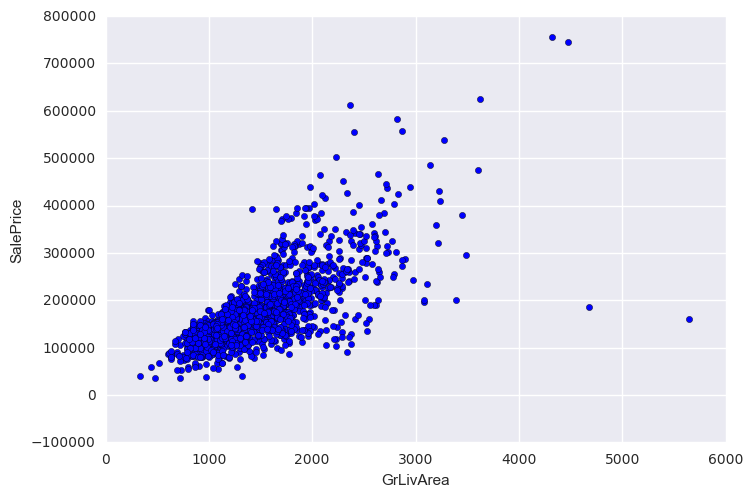

In [79]:
plt.scatter(train.GrLivArea, train.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# 找關係 by 類別 (scatter)
- 用seaborn來畫比較清楚

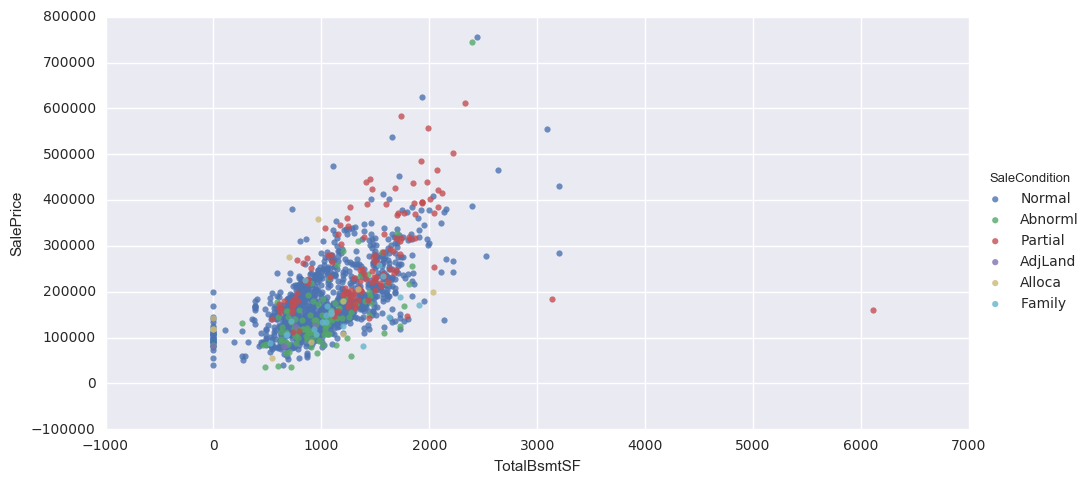

In [80]:
import seaborn as sns
sns.lmplot('TotalBsmtSF', 'SalePrice', data=train, hue='SaleCondition', aspect=2.0, fit_reg=False)

# 看分佈 (長條圖)

(array([ 148.,  723.,  373.,  135.,   51.,   19.,    4.,    3.,    2.,    2.]),
 array([  34900.,  106910.,  178920.,  250930.,  322940.,  394950.,
         466960.,  538970.,  610980.,  682990.,  755000.]),
 <a list of 10 Patch objects>)

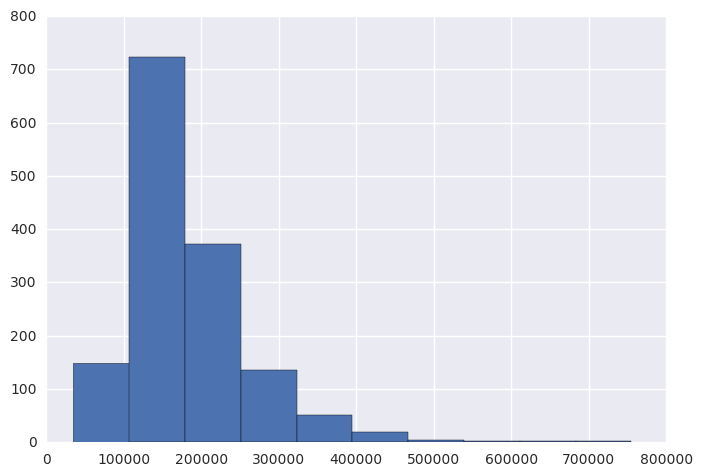

In [81]:
plt.hist(train.SalePrice)

# 懶人資料前處理

* 異常資料剔除


* 一、 (numerical) feature scaling -> 目的都是為了做最佳化時能得到比較好的解 (改變值域改變分佈就改變loss function)

   1. normalize(標準化)，把數值轉成std=1, mean=0 
     * (http://speech.ee.ntu.edu.tw/~tlkagk/courses/ML_2016/Lecture/Gradient%20Descent%20(v2).pdf#page=22)
   2. 取log (為什麼要用log1p? 把浮點數怪怪的問題解決掉 
     * (http://scicomp.stackexchange.com/questions/20629/when-should-log1p-and-expm1-be-used)
   
* 二、 missing value取mean

* 三、 get dummies (Convert categorical variable into dummy/indicator variables) (用例子看比較清楚)

## 資料整理 (把異常資料剔除)

In [ ]:
train.drop(train[train.GrLivArea > 4000].index, inplace='True') #房子一百多坪但是很便宜???
train.drop(train[train.TotalBsmtSF > 2500].index, inplace='True')
train.drop(train[train.TotalBsmtSF == 0].index, inplace='True')

## 一、feature scaling
## 取normalize (值域變了，分佈不變)

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013467F98>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000014099470>]], dtype=object)

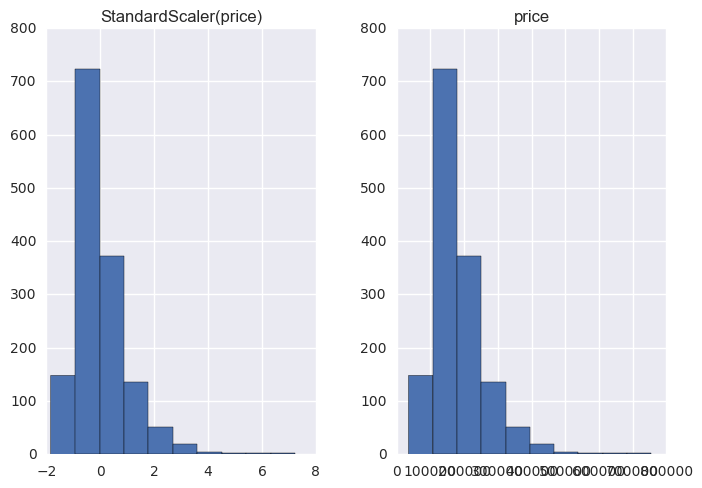

In [82]:
from sklearn.preprocessing import StandardScaler

# warning先不管
scaler = StandardScaler().fit(train["SalePrice"])
prices_scaled = scaler.transform(train["SalePrice"])

prices = pd.DataFrame({"price":train["SalePrice"], "StandardScaler(price)":prices_scaled})
prices.hist()

## 取log (值域變了，分佈也變了)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000142BEDD8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000014437DD8>]], dtype=object)

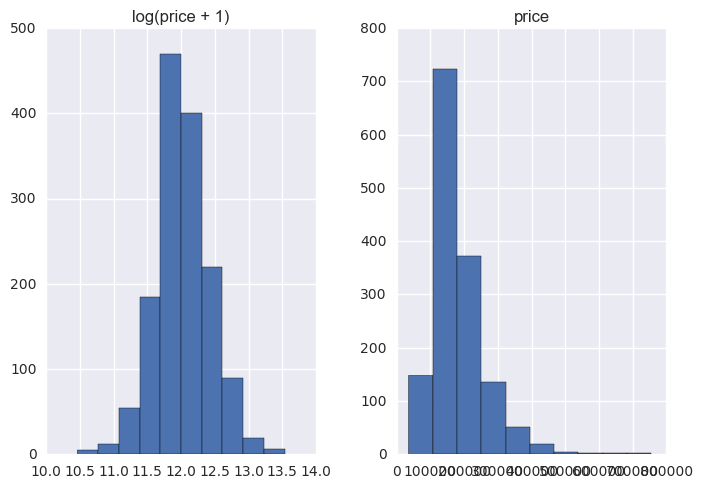

In [83]:
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
prices.hist()

## 計算資料多歪(skew) 

1. 先抓出數值型的參數
2. 計算資料有多歪

Id                0.000000
MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
S

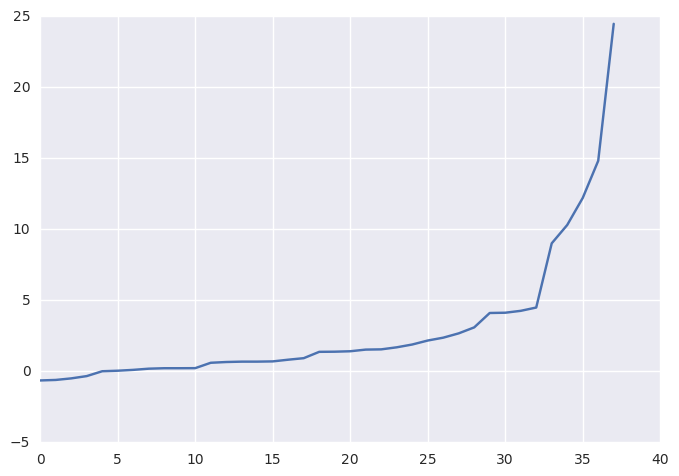

In [84]:
from scipy.stats import skew
numeric_feats = train.dtypes[train.dtypes != "object"].index
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
print skewed_feats
plt.plot(skewed_feats.sort_values().values)

## 把0.75以上的挑出來取log (why???)

In [85]:
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
train[skewed_feats] = np.log1p(train[skewed_feats])

## 找一筆最歪的畫長條圖看看 (MiscVal, Skew = 24.451640)
### 看不出什麼，變化沒有像SalePrices那麼明顯

(array([  1.40800000e+03,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          3.80000000e+01,   9.00000000e+00,   2.00000000e+00,
          2.00000000e+00]),
 array([ 0.        ,  0.96486598,  1.92973196,  2.89459795,  3.85946393,
         4.82432991,  5.78919589,  6.75406187,  7.71892785,  8.68379384,
         9.64865982]),
 <a list of 10 Patch objects>)

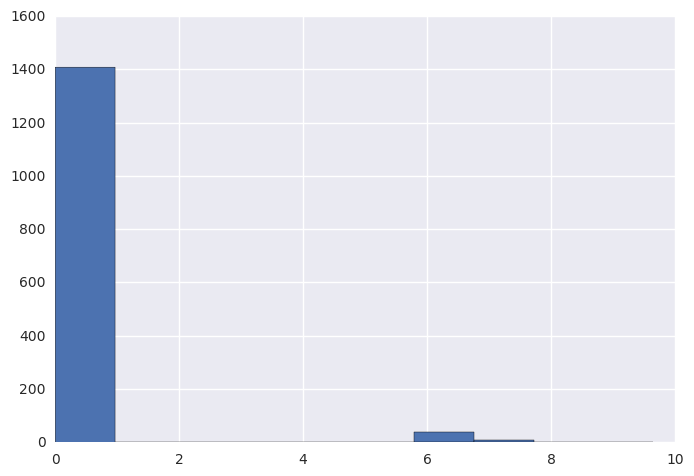

In [88]:
plt.hist(train.MiscVal)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001472C748>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000014AF9320>]], dtype=object)

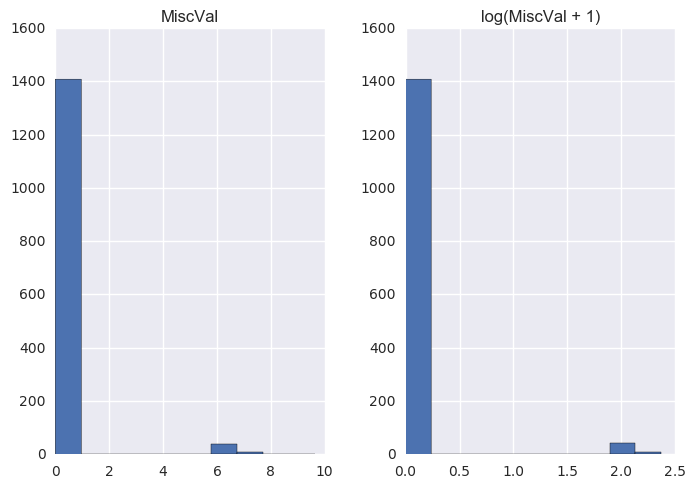

In [89]:
MiscVal = pd.DataFrame({"MiscVal":train["MiscVal"], "log(MiscVal + 1)":np.log1p(train["MiscVal"])})
MiscVal.hist()

## 二、missing value處理 (一行結束了)

In [90]:
train = train.fillna(train.mean())

## 三、類別型參數dummy化 (把類別攤開)

In [95]:
pd.get_dummies(train.SaleCondition).head()

,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


## 然後丟進去NN跑一跑就結束了 (分數不太好)

### NN架構怎麼選，其實我是try and submit (用分數來選定@@)

### 兩層hidden layer

model = Sequential()    
model.add(Dense(input_dim=p, output_dim=20, activation='relu', W_regularizer=l2(0.0001), init='zero'))      
model.add(Dense(output_dim=1, activation='relu'))

model.compile(loss='mse', optimizer='adam')
    
hist = model.fit(x_train, y_train, nb_epoch=500, batch_size=10, validation_split=0.2, verbose=2)